<a href="https://colab.research.google.com/github/mgmgc/AD-IA/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 14.8 MB/s eta 0:00:00


 Use the generate data() function from pyod.utils.data to generate a 2
dimensional dataset with 500 normal samples (400 training samples and 100
 test samples) with a contamination rate of 0.1.
 Use pyplot.scatter() function to plot the training samples, choosing a dif
ferent color for the outliers.

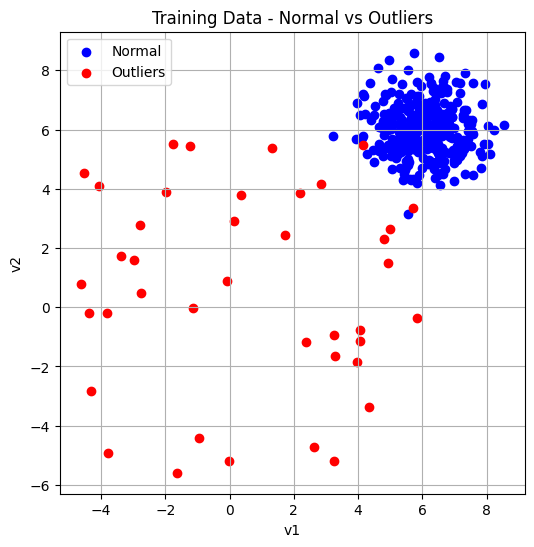

In [ ]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

cont = 0.1
X_train, X_test, y_train, y_test = generate_data(
    n_train = 400,
    n_test = 100,
    n_features = 2,
    contamination = cont,
    random_state = 42
)

X_train_normal = X_train[y_train == 0]
X_train_outliers = X_train[y_train == 1]

plt.figure(figsize=(6, 6))
plt.scatter(X_train_normal[:, 0], X_train_normal[:, 1],
            c='blue', label='Normal')
plt.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1],
            c='red', label='Outliers')
plt.title("Training Data - Normal vs Outliers")
plt.xlabel("v1")
plt.ylabel("v2")
plt.legend()
plt.grid(True)
plt.show()


 Choose a model from pyod (ex: KNN), leave all the parameters default (ex
cept the contamination, which will match the contamination used for dataset
 generation) and fit it with the training data. Get the predictions of the model
 for both the training and the testing data.
 Use the confusion matrix function from sklearn.metrics to find the
 number of TN, TP, FN and FP and compute the balanced accuracy.
 Use the roc curve() function from sklearn.metrics to compute the ROC
 curve and then plot it with plot() function.
 Change the contamination rate used by the model and see how the reported
 metrics change.

TRAIN : TN 358 TP 38 FN 2 FP 2 BA 0.9722222222222222
TEST : TN 90 TP 9 FN 1 FP 0 BA 0.95


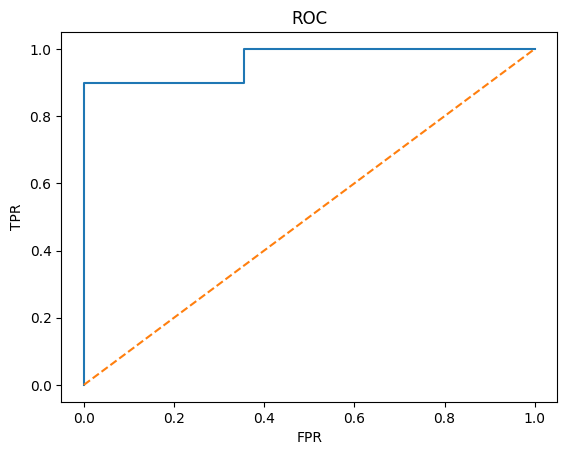

contamination= 0.02 BA_train 0.6 BA_test 0.65
contamination= 0.05 BA_train 0.75 BA_test 0.75
contamination= 0.1 BA_train 0.9722222222222222 BA_test 0.95
contamination= 0.2 BA_train 0.9305555555555556 BA_test 0.9222222222222223
contamination= 0.3 BA_train 0.8888888888888888 BA_test 0.8666666666666667


In [ ]:
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve


clf = KNN(contamination=cont).fit(X_train)
ptr,pte = clf.labels_,clf.predict(X_test)

tn,fp,fn,tp = confusion_matrix(y_train,ptr,labels=[0,1]).ravel()
print("TRAIN : TN",tn,"TP",tp,"FN",fn,"FP",fp,"BA",balanced_accuracy_score(y_train,ptr))
tn,fp,fn,tp = confusion_matrix(y_test,pte,labels=[0,1]).ravel()
print("TEST : TN",tn,"TP",tp,"FN",fn,"FP",fp,"BA",balanced_accuracy_score(y_test,pte))

fpr,tpr,_ = roc_curve(y_test,clf.decision_function(X_test))
plt.plot(fpr,tpr);
plt.plot([0,1],[0,1],"--");
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.title("ROC");
plt.show()

for c in [0.02,0.05,0.1,0.2,0.3]:
    m = KNN(contamination=c).fit(X_train)
    print("contamination=",c,"BA_train",balanced_accuracy_score(y_train,m.labels_),"BA_test",balanced_accuracy_score(y_test,m.predict(X_test)))


 Generate a unidimensional dataset with 10 % contamination rate, 1000 train
ing samples and no testing samples using generate data(). Try to detect the
 anomalies in the dataset by using the Z-scores. In order to do that you should
 compute the Z-score threshold that would classify the given percent (contami
nation rate) of data as anomalies (use np.quantile() function). Compute the
 balanced accuracy of the designed method.

In [ ]:
import numpy as np
cont=0.1
X_train, X_test, y_train, y_test = generate_data(n_train=1000,n_test=0,n_features=1,contamination=cont,random_state=42)
z = ((X_train.ravel()-X_train.mean())/X_train.std())
thr = np.quantile(np.abs(z),1-cont)
y_pred = (np.abs(z)>=thr).astype(int)
print("Balanced Accuracy:",balanced_accuracy_score(y_train,y_pred))


Balanced Accuracy: 0.8388888888888888


 Same as Ex. 3 but for a multidimensional dataset. Choose your own mean
 vector µ and covariance matrix Σ and build your dataset by hand starting with
 the samples generated from a multivariate standard normal distribution, x ∼
 N(0,I). Using the Cholesky decomposition of the covariance matrix Σ = LLT
 draw your samples y like this: y = Lx+µ and then compute the Z-scores. All
 other tasks as in Ex. 3.


In [ ]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

np.random.seed(42)
n = 1000
d = 3
cont = 0.1
mu = np.array([1, 2, 3])

#sigma aleasa astfel incat sa fie pozitiv definita, sa pot aplica Cholesky
Sigma = np.array([
    [4, 1, 0],
    [1, 9, 2],
    [0, 2, 16]
])

#verificare sigma e pozitiv definita
print(np.all(np.linalg.eigvals(Sigma) > 1e-12))

L = np.linalg.cholesky(Sigma)

#numar de anomalii
n_out = int(n * cont)
#numar de normale
n_in = n - n_out
#generare date normale dintr o distributie normala (0,1)
x_in = np.random.randn(n_in, d)
#generare anomalii deplasate departe fata de origine, separabile clar
x_out = np.random.randn(n_out, d) + 5
#transformare Cholesky y = Lx + mu, media miu covarianta sigma, L matricea
#Cholesky a lui sigma, sigma =L L.T
y = np.vstack([x_in, x_out]) @ L.T + mu
#etichete rale pt datele generale
y_true = np.array([0] * n_in + [1] * n_out)

# scoatem pe x din y = LX +mu, inversa transformarii
z = np.linalg.solve(L, (y - mu).T).T
#norma lui z, folosita pentru predictie
score = np.linalg.norm(z, axis = 1)
#prag pt anomalii
thr = np.quantile(score, 1 - cont)
#calcul predictii
y_pred = (score >= thr).astype(int)

print("Balanced Accuracy:", balanced_accuracy_score(y_true, y_pred))


True
Balanced Accuracy: 1.0
